#Projeto 1 - Rede MLP - Redes Neurais Artificiais

##Gabriel Schrader Vilas Boas, RA: 150981

Abaixo, seguem as implementações da rede neural MLP para um caso de classificação e outro de regressão. Para cada caso, um dataset diferente foi utilizado, sendo o dataset diabetes utilizado para classificação e o dataset insurance para regressão. Para cada implementação, diferentes topologias e hiperparâmetros serão testados e analisados, de forma a observar os diferentes comportamentos obtidos. Além disso, vale ressaltar que as implementações foram todas baseadas e feitas com base no uso da biblioteca sklearn, que já possui implementações para o classificador e o regressor MLP. Para finalizar, temos que, além deste arquivo .ipynb, serão enviados cada algoritmo .py e arquivos .csv separadamente caso seja melhor de acompanhar o funcionamento de cada algoritmo.

#Bibliotecas utilizadas

In [97]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Classificador MLP

##Arquivos importados

In [98]:
from google.colab import files
import io
data_to_load = files.upload()
data = pd.read_csv(io.BytesIO(data_to_load['diabetes.csv']))

Saving diabetes.csv to diabetes (8).csv


Abaixo, temos o código geral utilizado para executar a rede MLP para classificação do dataset diabetes, que, com base em determinadas características de um indivíduo, classifica se tal indivíduo tem - ou não - diabetes. Após esse código teremos gráficos que mostram diferentes utilizações do mesmo, considerando outras topologias e outras diferenças entre os hiperparâmetros.

##Algoritmo

In [99]:
df_norm = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

target = data['Outcome']

preg = df_norm['Pregnancies']
gluc = df_norm['Glucose']
bp = df_norm['BloodPressure']
st = df_norm['SkinThickness']
insulin = df_norm['Insulin']
bmi = df_norm['BMI']
dpf = df_norm['DiabetesPedigreeFunction']
age = df_norm['Age']

X = np.column_stack((preg, gluc, bp, st, insulin, bmi, dpf, age))
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

###Teste 1

In [103]:
mlpClass = MLPClassifier(solver = 'sgd', max_iter=10000, momentum=0.95, alpha=0.1, learning_rate_init= 1, early_stopping=True, validation_fraction=0.2, activation = 'relu')
mlpClass.fit(X_train, y_train)

prediction = mlpClass.predict(X_test)
print("Predicao: ", prediction)
print("Teste: ", y_test.values)
print('Acurácia:', mlpClass.score(X_test, y_test))

Predicao:  [0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]
Teste:  [0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0]
Acurácia: 0.7337662337662337


Para o dataset escolhido, a eficácia da classificação do MLP é de 70% a 82%, considerando os seguintes hiperparâmetros, todos passados no argumento da classe MLPClassifier da biblioteca sklearn:
- Algoritmo original SGD;
- Momentum = 0.95;
- Força de regularização (L2) = 0.1;
- População de validação = 20% da população de treino (representado por *validation_fraction*);
- Ativação ReLU;
- Taxa de aprendizado inicial = 1;
- Tipo de aprendizado = constante;
- Número máximo de épocas = 10000
- Dentre outras características omitidas como argumento de MLPClassifier mas seguindo valores "default" da classe quando essa é inicializada. A maioria dos testes seguintes seguirá estes dados, exceto por mudanças em topologias e/ou L2 e momentum.



Abaixo, temos um gráfico que ilustra a loss do algoritmo para cada época decorrida até se término, ou seja, não houve mudança relevante nas últimas 10 épocas.

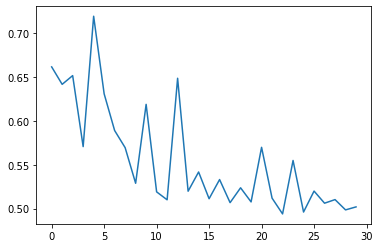

In [104]:
plt.plot([i for i in range(mlpClass.n_iter_)], mlpClass.loss_curve_)
plt.show()

###Teste 2

Neste teste, temos o momentum sendo igual a zero, tendo como intuito analisar quão diferente fica a acurácia e predição do algoritmo.

In [105]:
mlpClass = MLPClassifier(hidden_layer_sizes = (1000), solver = 'sgd', max_iter=10000, momentum=0.0, alpha=0.1, learning_rate_init= 1, early_stopping=True, validation_fraction=0.2, activation = 'relu')

mlpClass.fit(X_train, y_train)

prediction = mlpClass.predict(X_test)
print("Predicao: ", prediction)
print("Teste: ", y_test.values)
print('Acurácia:', mlpClass.score(X_test, y_test))

Predicao:  [0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 0]
Teste:  [0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0]
Acurácia: 0.7727272727272727


###Teste 3

Agora, testamos como funciona o algoritmo no cenário em que a força de regularização (L2) é alta. Além disso, outra topologia é escolhida, com uma camada oculta.

In [106]:
mlpClass = MLPClassifier(hidden_layer_sizes = (100), solver = 'sgd', max_iter=10000, momentum=0.95, alpha=1, learning_rate_init= 1, early_stopping=True, validation_fraction=0.2, activation = 'relu')

mlpClass.fit(X_train, y_train)

prediction = mlpClass.predict(X_test)
print("Predicao: ", prediction)
print("Teste: ", y_test.values)
print('Acurácia:', mlpClass.score(X_test, y_test))

Predicao:  [0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 0]
Teste:  [0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0]
Acurácia: 0.7207792207792207


###Teste 4

Topologia diferente: maior número de camadas. Nesse caso, levando em consideração os outros parâmetros, a efetividade do algoritmo cai consideravelmente.

In [108]:
mlpClass = MLPClassifier(hidden_layer_sizes = (100, 100, 100), solver = 'sgd', max_iter=10000, momentum=0.95, alpha=1, learning_rate_init= 1, early_stopping=True, validation_fraction=0.2, activation = 'relu')

mlpClass.fit(X_train, y_train)

prediction = mlpClass.predict(X_test)
print("Predicao: ", prediction)
print("Teste: ", y_test.values)
print('Acurácia:', mlpClass.score(X_test, y_test))

Predicao:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Teste:  [0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0]
Acurácia: 0.6558441558441559


###Teste 5

Esse é o teste final para a classificação de diabetes. Nesse teste, o número de camadas será ainda maior, porém a taxa de aprendizado inicial será diferente. Apesar da acurácia não parecer tão baixa, o algoritmo com esses parâmetros não acerta nenhuma caso positivo de diabetes.

In [113]:
mlpClass = MLPClassifier(hidden_layer_sizes = (8, 8, 8, 8, 8), solver = 'sgd', max_iter=10000, momentum=0.75, alpha=0.5, learning_rate_init= 0.5, early_stopping=True, validation_fraction=0.2, activation = 'relu')

mlpClass.fit(X_train, y_train)

prediction = mlpClass.predict(X_test)
print("Predicao: ", prediction)
print("Teste: ", y_test.values)
print('Acurácia:', mlpClass.score(X_test, y_test))

Predicao:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Teste:  [0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0]
Acurácia: 0.6558441558441559


#Regressor MLP

##Arquivos importados

In [114]:
from google.colab import files
import io
data_to_load = files.upload()
data = pd.read_csv(io.BytesIO(data_to_load['insurance.csv']))

Saving insurance.csv to insurance (3).csv


Para este algoritmo, não consegui reproduzir resultados satisfátorios como o algoritmo original SGD, uma vez que a única saída obtida era a média das saídas esperadas, não importasse qual (ou quais) hiperparâmetros eu alterasse. Apesar disso, irei mostrar abaixo esta versão falha do algoritmo e, logo em seguida, uma versão utilizando o algoritmo otimizado ADAM, que produz resultados mais satisfatórios e próximos aos esperados.

Além disso, poderá ser visto um gráfico de loss durante a execução do algoritmo MLP por SGD e por ADAM. Percebe-se que a perda no SGD é extremamente grande para a regressão, talvez sendo um porquê de este não estar produzindo respostas boas.

##Algoritmo (com SGD, dando errado a predição)

In [119]:
data['sex'].replace({'female': 1, 'male': 0}, inplace = True)
data['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)
data['region'].replace({'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}, inplace = True)

data['sex'].replace({'female': 1, 'male': 0}, inplace = True)
data['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)
data['region'].replace({'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}, inplace = True)

df_norm = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

target = data['charges']

age = df_norm['age']
sex = df_norm['sex']
bmi = df_norm['bmi']
children = df_norm['children']
smoker = df_norm['smoker']
region = df_norm['region']

X = np.column_stack((age, sex, bmi, children, smoker, region))
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

mlpRegres = MLPRegressor(solver = 'sgd', max_iter=10000, momentum=0, alpha=1, learning_rate_init= 0.5, random_state=1, early_stopping=True, validation_fraction=0.2, activation = 'relu')
mlpRegres.fit(X_train, y_train)
prediction = mlpRegres.predict(X_test)
#print(prediction, y_test.values)
print("Score da regressão: ", mlpRegres.score(X_test, y_test))

Score da regressão:  -0.011496919791020632


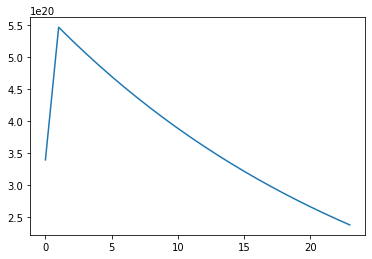

In [120]:
plt.plot([i for i in range(mlpRegres.n_iter_)], mlpRegres.loss_curve_)
plt.show()

##Algoritmo (com ADAM)

In [121]:
data['sex'].replace({'female': 1, 'male': 0}, inplace = True)
data['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)
data['region'].replace({'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}, inplace = True)

data['sex'].replace({'female': 1, 'male': 0}, inplace = True)
data['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)
data['region'].replace({'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}, inplace = True)

df_norm = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

target = data['charges']

age = df_norm['age']
sex = df_norm['sex']
bmi = df_norm['bmi']
children = df_norm['children']
smoker = df_norm['smoker']
region = df_norm['region']

X = np.column_stack((age, sex, bmi, children, smoker, region))
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

mlpRegres = MLPRegressor(solver = 'adam', max_iter=10000, momentum=0, alpha=1, learning_rate_init= 0.5, random_state=1, early_stopping=True, validation_fraction=0.2, activation = 'relu')
mlpRegres.fit(X_train, y_train)
prediction = mlpRegres.predict(X_test)
#print(prediction, y_test.values)
print("Score da regressão: ", mlpRegres.score(X_test, y_test))

Score da regressão:  0.8531345097467999


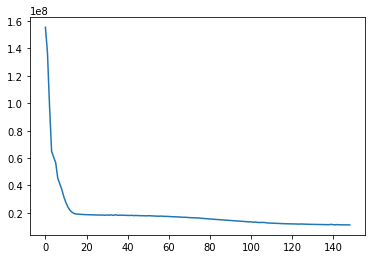

In [122]:
plt.plot([i for i in range(mlpRegres.n_iter_)], mlpRegres.loss_curve_)
plt.show()